Import libraries

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

Load and generate data

In [12]:
data = pd.read_csv('Servo Mechanism.csv')

df = pd.DataFrame(data)

# Generate Additional Data
np.random.seed(42)  # For reproducibility

additional_data = pd.DataFrame({
    'Motor': np.random.choice(df['Motor'], 1500, replace=True),
    'Screw': np.random.choice(df['Screw'], 1500, replace=True),
    'Pgain': np.random.choice(df['Pgain'], 1500, replace=True),
    'Vgain': np.random.choice(df['Vgain'], 1500, replace=True),
    'Class': np.random.choice(df['Class'], 1500, replace=True)
})

df = pd.concat([df, additional_data], ignore_index=True)

Data Inspection

             Pgain        Vgain        Class
count  1667.000000  1667.000000  1667.000000
mean      4.171566     2.525495    21.714457
std       1.018712     1.356074    13.900566
min       3.000000     1.000000     1.000000
25%       3.000000     1.000000    11.000000
50%       4.000000     2.000000    20.000000
75%       5.000000     4.000000    34.000000
max       6.000000     5.000000    51.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   1667 non-null   object
 1   Screw   1667 non-null   object
 2   Pgain   1667 non-null   int64 
 3   Vgain   1667 non-null   int64 
 4   Class   1667 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 65.2+ KB
None


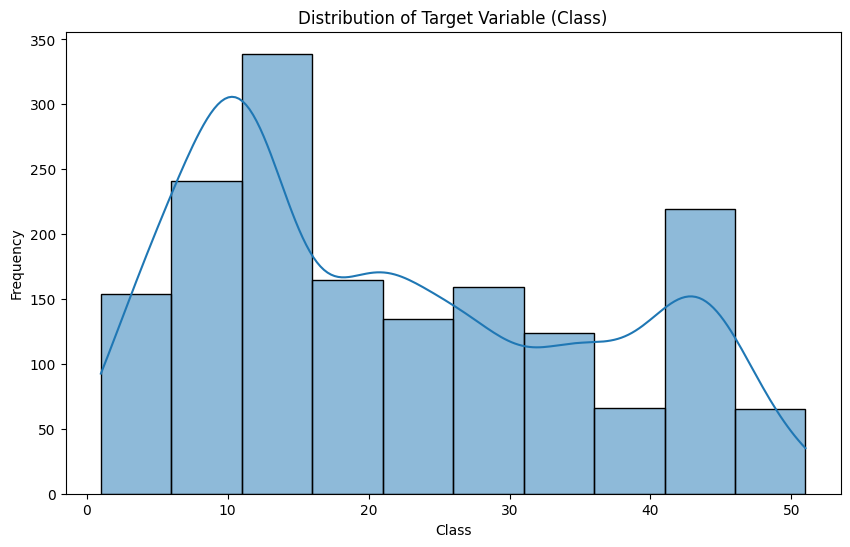

Motor    0
Screw    0
Pgain    0
Vgain    0
Class    0
dtype: int64


In [13]:
# Step 1: Data Overview
print(df.describe())
print(df.info())

# Plot distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Class'], kde=True, bins=10)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Step 2: Data Cleaning
print(df.isnull().sum())

Visualization of data

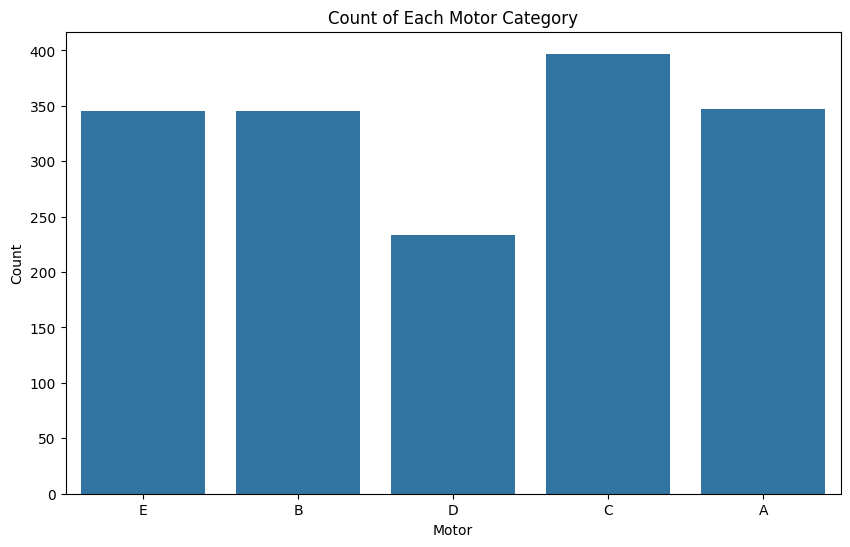

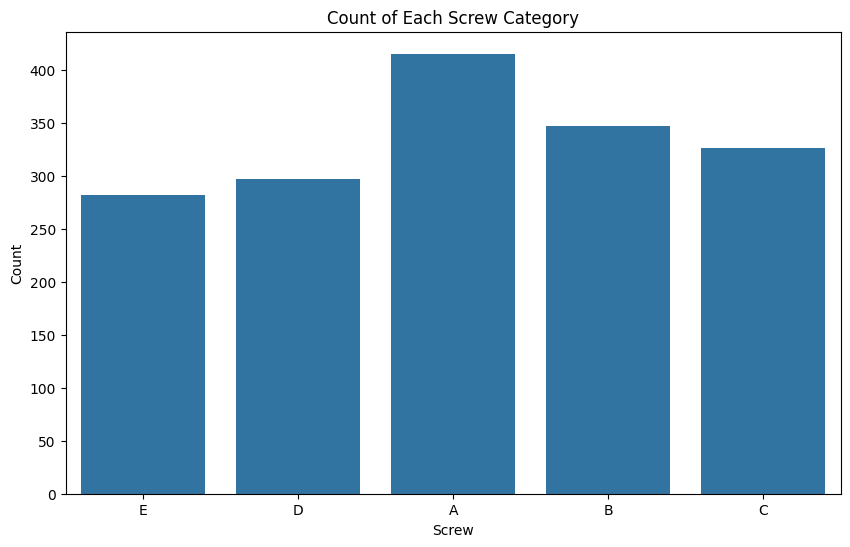

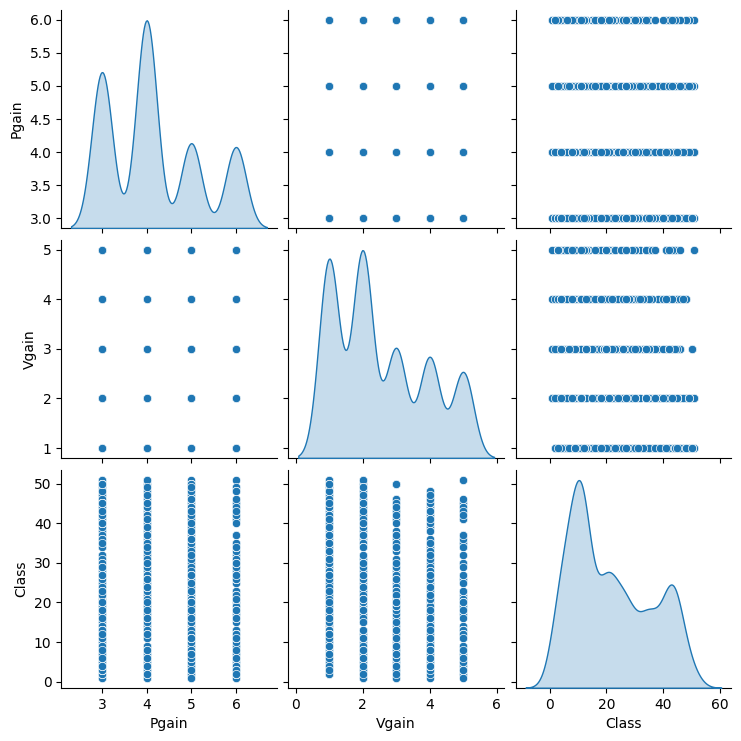

In [14]:
# Step 3: Feature Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Motor', data=df)
plt.title('Count of Each Motor Category')
plt.xlabel('Motor')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Screw', data=df)
plt.title('Count of Each Screw Category')
plt.xlabel('Screw')
plt.ylabel('Count')
plt.show()

sns.pairplot(df, diag_kind='kde')
plt.show()

Data correlation

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


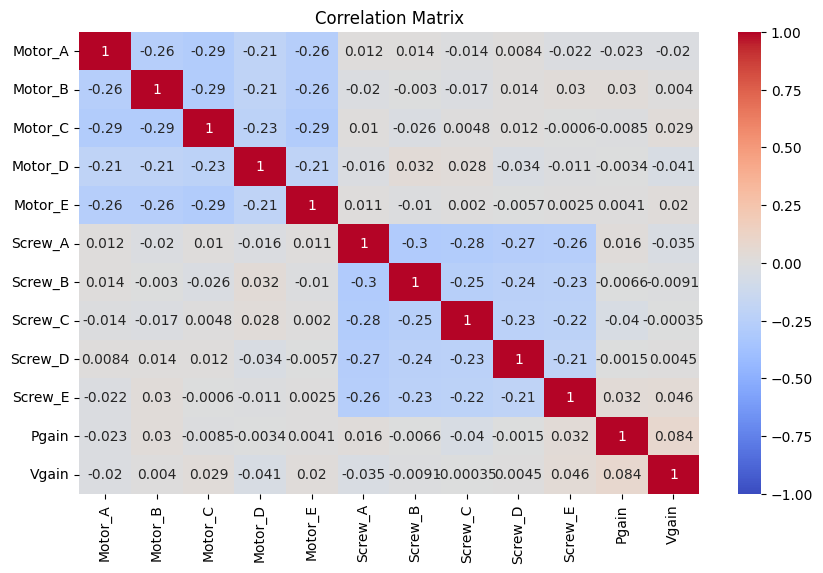

In [15]:
# Step 4: Correlation Analysis
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(df[['Motor', 'Screw']])

X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Motor', 'Screw']))

# Combine the encoded features with the numerical features
X_final = pd.concat([X_encoded_df, df[['Pgain', 'Vgain']].reset_index(drop=True)], axis=1)

# Calculate correlation matrix
corr_matrix = X_final.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Model training - Linear Regression

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Motor_A  Motor_B  Motor_C  Motor_D  Motor_E  Screw_A  Screw_B  Screw_C  \
0      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
1      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
3      0.0      1.0      0.0      0.0      0.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      1.0      0.0   

   Screw_D  Screw_E  Pgain  Vgain  
0      0.0      1.0      5      4  
1      1.0      0.0      6      5  
2      1.0      0.0      4      3  
3      0.0      0.0      3      2  
4      0.0      0.0      6      5  


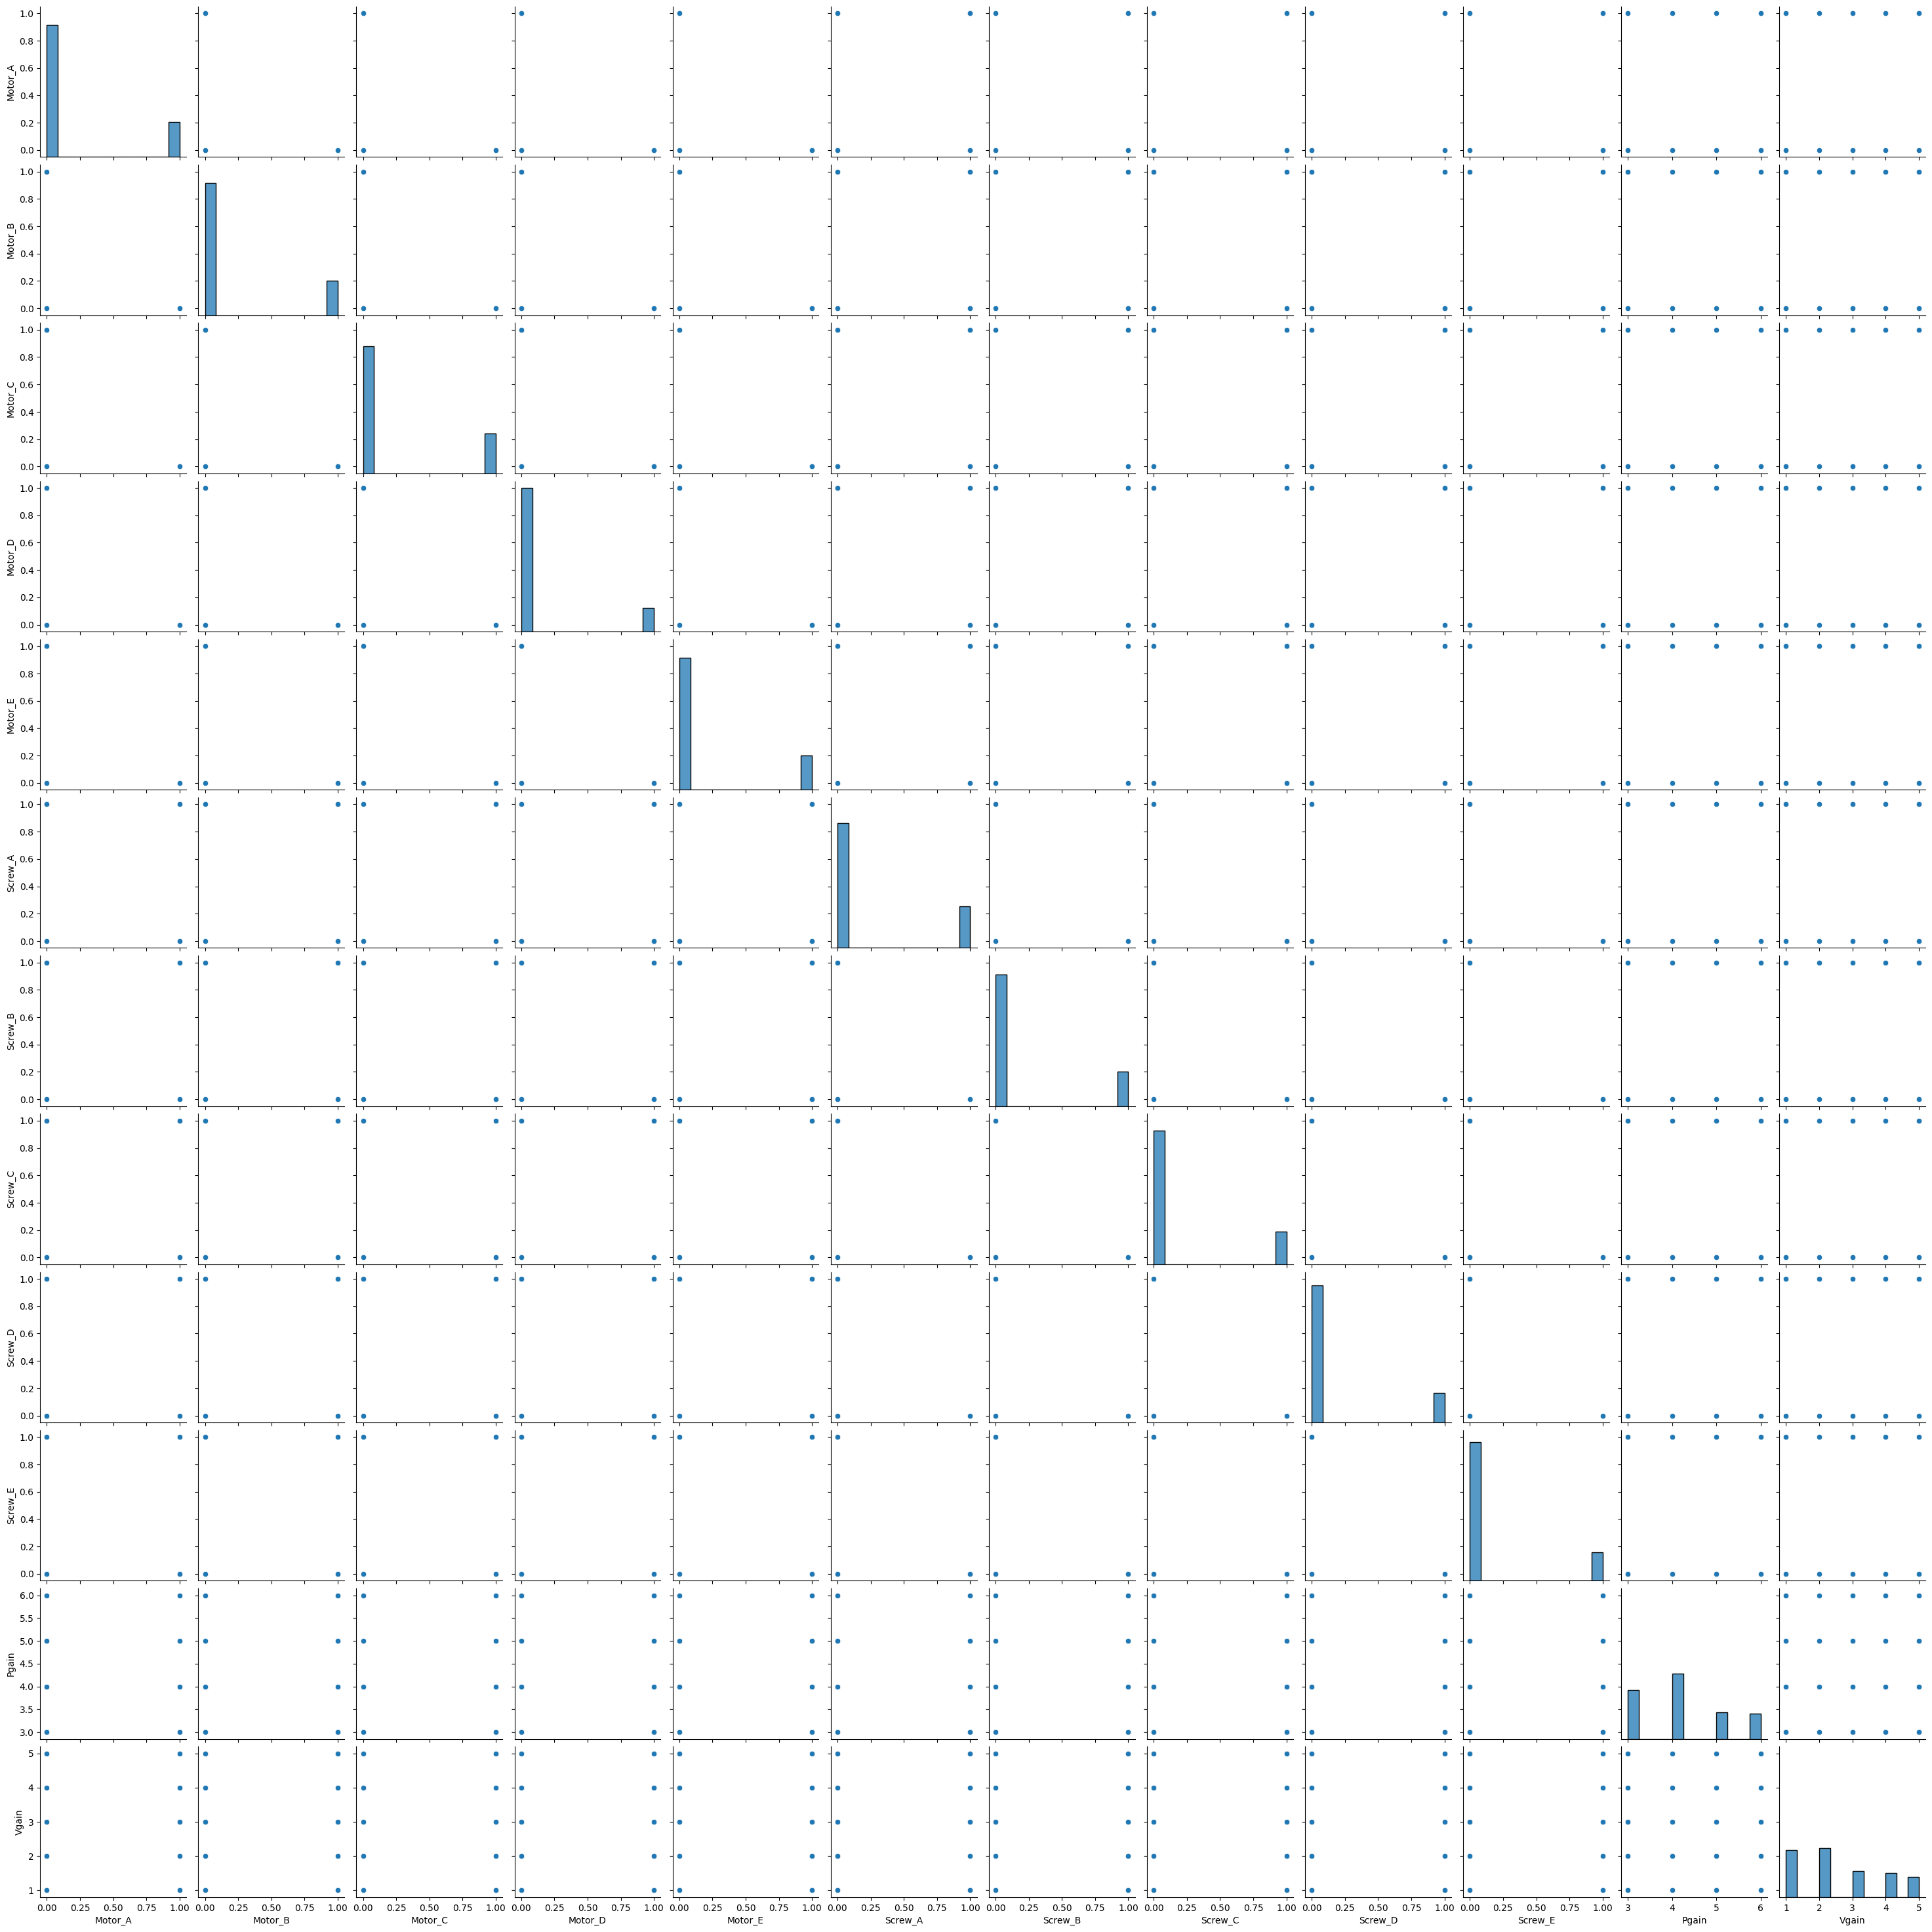

Mean Squared Error with Linear Regression: 196.1324304515968


In [16]:
# Feature Encoding
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(df[['Motor', 'Screw']])

X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Motor', 'Screw']))

X_final = pd.concat([X_encoded_df, df[['Pgain', 'Vgain']].reset_index(drop=True)], axis=1)

print(X_final.head())

sns.pairplot(X_final)
plt.show()

# Model Training
X_train, X_test, y_train, y_test = train_test_split(X_final, df['Class'], test_size=0.3, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate and display Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Linear Regression: {mse}')

Model training - Ridge regression

In [17]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f'Mean Squared Error with Ridge Regression: {ridge_mse}')

Mean Squared Error with Ridge Regression: 195.34456290178096


Model training - Decision Tree Regression

In [18]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
print(f'Mean Squared Error with Decision Tree Regression: {tree_mse}')

Mean Squared Error with Decision Tree Regression: 282.2852183809374


Performance of models

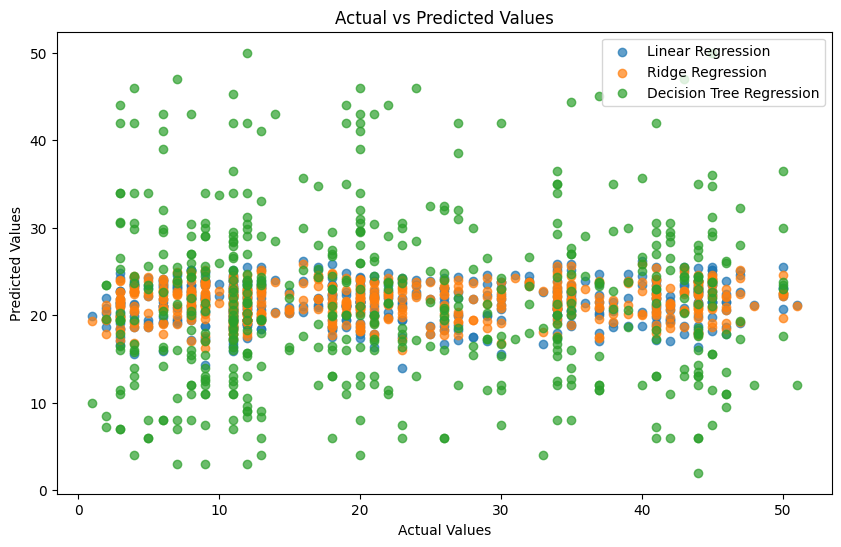

In [19]:
# Plot the predicted vs actual values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Linear Regression')
plt.scatter(y_test, ridge_pred, alpha=0.7, label='Ridge Regression')
plt.scatter(y_test, tree_pred, alpha=0.7, label='Decision Tree Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Visualizations

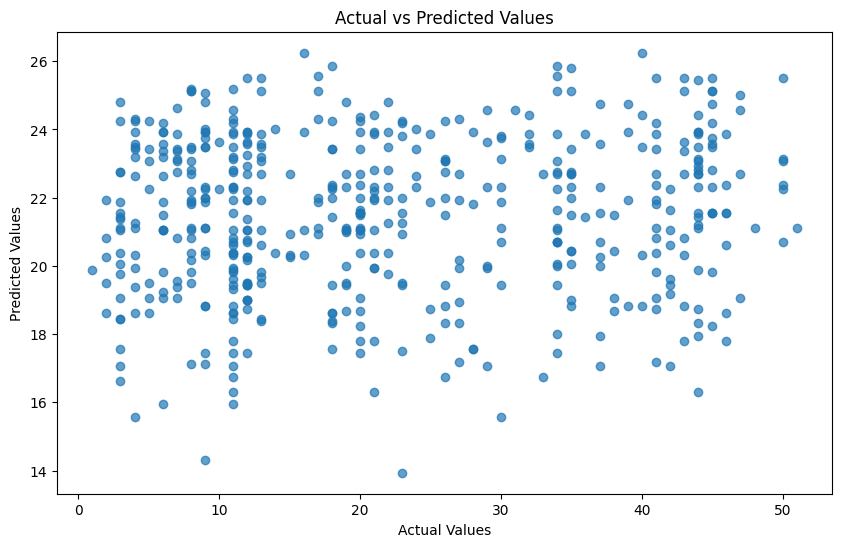

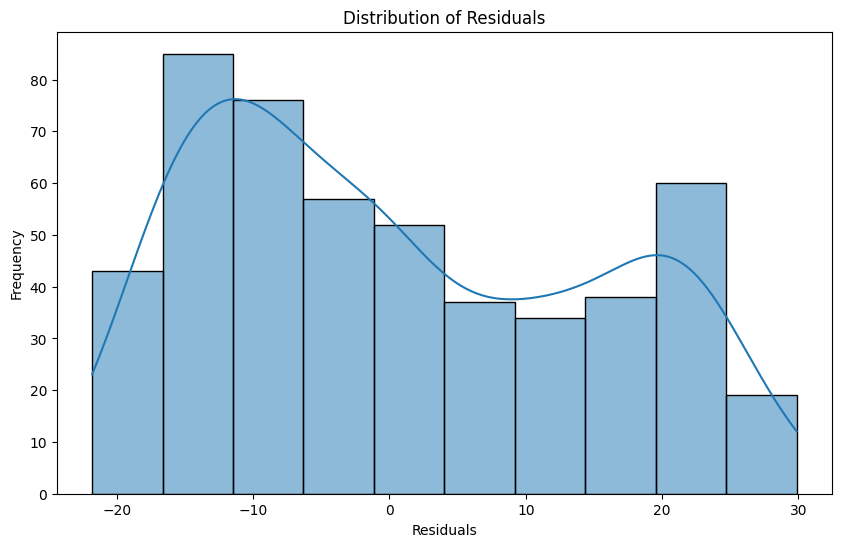

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()